In [1]:
import os
import time
import sys
sys.path.append('./BASS/')
sys.path.append('./Utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from GMM import GMM_model, GMM_synthetic
import bass as md

In [2]:
# 7 50 5 10000 0.0 0.0 0.15 4 0.0 1

Sigma = 7
dict_size = 50
wordlength = 5
L = 5000 
std = 1.0/4

eps_true = 0.0
p_d_true = 0.5
p_ins_true = 0.2
p_b = 0.0

params_true = np.array([eps_true,p_d_true,p_ins_true,0,0,Sigma])

In [45]:
np.random.seed(121)
alphfreqs = np.random.dirichlet(5*np.ones(Sigma))
model_true = GMM_synthetic(params_true, std)
w_dict_true = md.generate_w_dict(alphfreqs,dict_size,wordlength)

In [46]:
print(w_dict_true)

[array([4, 6, 6, 6, 5]), array([3, 3, 6, 6, 5, 0, 4]), array([0, 2]), array([3, 6, 6, 4]), array([6, 0, 5, 5, 5, 6, 6, 2, 6, 3]), array([3, 5, 6, 6]), array([3, 1, 2, 2, 5]), array([4, 3, 5, 5]), array([6, 2]), array([5, 2, 6, 4, 4, 1, 3, 1, 5]), array([3, 2, 0, 5, 0, 0, 5]), array([4, 5, 1, 3, 6, 3]), array([3, 5, 0, 5, 4, 6, 4]), array([5, 6, 3, 1]), array([6, 4, 4]), array([2, 6, 4, 0]), array([0, 1]), array([4, 5, 4, 1, 5, 0]), array([5, 6, 5, 6, 3, 2, 3]), array([2, 3, 4]), array([0, 4, 6]), array([5, 6, 6, 6, 6]), array([3, 1, 5, 6, 2]), array([6, 5, 6, 6, 0, 2]), array([6, 3, 1, 3, 4, 4]), array([3, 5]), array([6, 6, 2, 6, 0]), array([3, 3, 2, 5, 1]), array([3, 1, 6, 5, 0, 0]), array([0, 6, 6, 2]), array([1, 4, 3, 6]), array([1, 6]), array([4, 0, 1]), array([5, 2, 6, 6, 1, 6, 6]), array([4, 6, 6, 2, 6]), array([6, 1, 6, 2]), array([6, 4, 3, 2]), array([4, 6, 0]), array([3, 6, 4, 5, 5, 1, 3]), array([5, 5, 3]), array([6, 5, 1, 5, 0, 4]), array([0, 6]), array([2, 1, 1, 1, 3, 0, 0]

In [47]:
np.random.seed(121)
P_w_true = np.zeros(len(w_dict_true))
P_w_true[:-Sigma] = np.random.dirichlet(1.0*np.ones(len(w_dict_true) - Sigma))*(1-p_b)
P_w_true[-Sigma:] = alphfreqs*p_b
Y,words_true,Y_data = md.generate_Y(L, P_w_true, w_dict_true, params_true,model_true)
lengths_Y = np.array([len(Y)],dtype = int)

In [48]:
P_dict_sorted = []
w_dict_sorted = []
num_instances = []
idx = np.argsort(-P_w_true)
motif_lengths = [len(w) for w in w_dict_true]
lmean = np.mean(motif_lengths)

for i in idx:
    P_dict_sorted.append(P_w_true[i])
    w_dict_sorted.append(w_dict_true[i])
    num_instances.append(int(P_w_true[i]*len(Y)/lmean))
    

In [49]:
full_dict = pd.DataFrame({'Probability':P_dict_sorted,'Number of instances':num_instances,'Sequences':w_dict_sorted})
print(full_dict)

    Probability  Number of instances                       Sequences
0      0.075831                   87     [5, 2, 6, 4, 4, 1, 3, 1, 5]
1      0.066811                   76           [3, 2, 0, 5, 0, 0, 5]
2      0.064301                   73                 [6, 6, 2, 6, 0]
3      0.058106                   66              [4, 5, 4, 1, 5, 0]
4      0.042684                   49                    [5, 6, 3, 1]
5      0.042446                   48                       [5, 5, 3]
6      0.038826                   44  [6, 0, 5, 5, 5, 6, 6, 2, 6, 3]
7      0.038707                   44              [6, 3, 1, 3, 4, 4]
8      0.037651                   43           [5, 2, 6, 6, 1, 6, 6]
9      0.033304                   38           [3, 6, 4, 5, 5, 1, 3]
10     0.032497                   37                          [3, 5]
11     0.029969                   34                    [4, 3, 5, 5]
12     0.029939                   34                    [0, 6, 6, 2]
13     0.029192                   

In [50]:
full_dict.to_csv('./Data/Synthetic_validation/Synthetic_truedict_condition1.csv')

In [21]:
# np.save('./Data/synth_dataset_condition1',Y_data)
# np.save('./Data/synth_lengths_condition1',lengths_Y)

In [22]:
print(lengths_Y)

[5003]


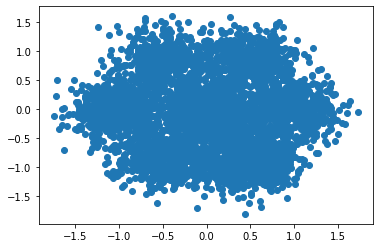

In [11]:
plt.scatter(Y_data[:,0],Y_data[:,1])

In [10]:
entropy = md.get_entropy(Y)
w_thr = 1e-5*np.exp(-entropy)
eps = 0.0
p_d = 0.5 
p_ins = 0.2 #Unused

Sigma = 7 
Jthr = 0.3
params = np.array([eps,p_d,p_ins, w_thr, Jthr, Sigma], dtype=float)
P_w, w_dict = md.solve_dictionary(Y,lengths_Y,params,model_true,15) #Solves for the dictionary. 

[]
Dictionary length 33
[]
Pruned length 17
1 iter, w_dict length = 17, Train -logL = 1.686
Dictionary length 50
[35 36 45 46 48]
Pruned length 30
2 iter, w_dict length = 30, Train -logL = 1.571
Dictionary length 64
[49 53 54]
Pruned length 36
3 iter, w_dict length = 36, Train -logL = 1.365
Dictionary length 64
[52 53]
Pruned length 32
4 iter, w_dict length = 32, Train -logL = 1.133
Dictionary length 48
[]
Pruned length 38
5 iter, w_dict length = 38, Train -logL = 1.026
Dictionary length 55
[]
Pruned length 42
6 iter, w_dict length = 42, Train -logL = 0.910
Dictionary length 54
[50 51]
Pruned length 41
7 iter, w_dict length = 41, Train -logL = 0.851
Dictionary length 47
[]
Pruned length 44
8 iter, w_dict length = 44, Train -logL = 0.814
Dictionary length 48
[47]
Pruned length 45
9 iter, w_dict length = 45, Train -logL = 0.808
Dictionary length 46
[]
Pruned length 44
10 iter, w_dict length = 44, Train -logL = 0.801
Dictionary length 44
[]
Pruned length 44
11 iter, w_dict length = 44, Tr

In [22]:
print("\n")
#Output
print("Dictionary")
print(w_dict[22])

print("\n")

print("\n")
#Output
print("True Dictionary")
print(w_dict_true[13])
print("\n")



Dictionary
[3 2 6 4 0 4]




True Dictionary
[3 2 6 4 0 4]




In [20]:
idx = np.argsort(P_w_true)[::-1]
print(idx)
print(P_w_true[13])

[13 30 36 32  0 34 29 11 44 15 18  1 16 28 35  3 42 14 38 31  8 26 10 41
  5 20 22 39 37 45  6 33 49  9  2 40 46 17  4 21 19 43 12 25 47 23  7 48
 24 27 54 50 55 51 53 52 56]
0.06784963962068925


In [17]:
idx = np.argsort(P_w)[::-1]
print(idx)
print(P_w[idx])

[22 24 16 19 20 17  7 33 13  8 29 30 15 27 11  2  9  1 31 38 14 18 32 34
 25 40 26 37 12  3 41  5 36 28 35  4 21  6 10  0 39 43 42 23]
[0.0633771  0.05454514 0.05163899 0.05162916 0.05051882 0.04265023
 0.03948246 0.0377097  0.03746888 0.03735276 0.03573001 0.03572898
 0.03474793 0.03143759 0.02676955 0.0266027  0.02495036 0.02474071
 0.02084391 0.02084376 0.01947906 0.01687981 0.0158901  0.0156344
 0.01498817 0.0132585  0.01246848 0.01089545 0.01079265 0.01022463
 0.00991927 0.00968817 0.00909676 0.00890605 0.00850647 0.00790321
 0.00790096 0.00786443 0.00773506 0.00771853 0.00759289 0.00694526
 0.00592468 0.00501831]


In [18]:
print(w_dict[idx])

TypeError: only integer scalar arrays can be converted to a scalar index